# ROC Curve: Visualizing Classifier Performance

#### video resource:- https://youtube.com/playlist?list=PLYwpaL_SFmcBhOEPwf5cFwqo5B-cP9G4P&si=67qAtB9RiZk58yeR
---

## 1. The Idea
👉 **ROC curve** = Receiver Operating Characteristic curve.
It shows the trade-off between detecting positives and making false alarms at different thresholds.

Every classifier that outputs probabilities or scores can shift its threshold (cutoff) — and the ROC curve shows how performance changes.

---

## 2. The Two Axes
- **Y-axis = TPR (Recall, Sensitivity):**
  
  $\text{TPR} = \frac{TP}{TP + FN}$
  
  “How many real positives did I catch?”

- **X-axis = FPR (False Positive Rate):**
  
  $\text{FPR} = \frac{FP}{FP + TN}$
  
  “Out of all actual negatives, how many did I wrongly call positive?”

So each threshold gives one point: (FPR, TPR).

---

## 3. How the Curve is Built
- Start with threshold = 1 (predict everything as Negative) → (FPR=0, TPR=0).
- Gradually lower threshold → more positives predicted.
- TPR increases (catch more positives).
- FPR also increases (more false alarms).
- At threshold = 0 (predict everything as Positive) → (FPR=1, TPR=1).
- Connect all these points → ROC curve.

---

## 4. Area Under the Curve (AUC)
- **AUC** = probability that the classifier ranks a random positive higher than a random negative.

  - 0.5 → random guessing (diagonal line).
  - 1.0 → perfect model.
  - <0.5 → worse than random (can be flipped).

---

## 5. Example Intuition
Medical test:
- If you set the threshold very strict, you’ll have high precision but low recall → point near bottom-left.
- If you set the threshold very loose, you’ll have high recall but many false alarms → point near top-right.
- ROC curve shows this full picture.


In [2]:
# Example: Calculating ROC Curve and AUC in Python

import numpy as np
from sklearn.metrics import roc_curve, auc

# Example data: true labels and predicted probabilities
# (You can change these to see different ROC shapes)
y_true = np.array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0])
y_scores = np.array([0.1, 0.4, 0.35, 0.8, 0.2, 0.7, 0.3, 0.9, 0.6, 0.05])

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

print(f"AUC: {roc_auc:.2f}")
print("FPR:", fpr)
print("TPR:", tpr)
print("Thresholds:", thresholds)


AUC: 0.96
FPR: [0.  0.  0.  0.2 0.2 1. ]
TPR: [0.  0.2 0.8 0.8 1.  1. ]
Thresholds: [ inf 0.9  0.6  0.4  0.35 0.05]


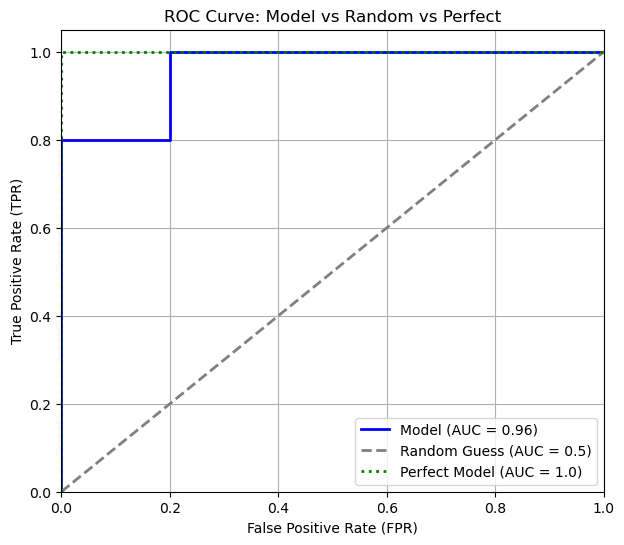

In [3]:
# Visualization: ROC Curve with All Conditions
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Use the same y_true and y_scores as before
# (If running standalone, uncomment and define y_true, y_scores)
# y_true = np.array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0])
# y_scores = np.array([0.1, 0.4, 0.35, 0.8, 0.2, 0.7, 0.3, 0.9, 0.6, 0.05])

fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))

# Model ROC
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Model (AUC = {roc_auc:.2f})')

# Random guess (diagonal)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess (AUC = 0.5)')

# Perfect model (step)
plt.plot([0, 0, 1], [0, 1, 1], color='green', lw=2, linestyle=':', label='Perfect Model (AUC = 1.0)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve: Model vs Random vs Perfect')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
